In [1]:
import matplotlib.pyplot as plt
import pandas as pd

 ## Generate some data

In [2]:
from sklearn.datasets import make_blobs

X, y = make_blobs(centers=2, random_state=42)

print(f"Labels: {y[:10]}")
print(f"Data: {X[:10]}")

Labels: [0 1 0 1 1 0 1 1 0 0]
Data: [[-2.98837186  8.82862715]
 [ 5.72293008  3.02697174]
 [-3.05358035  9.12520872]
 [ 5.461939    3.86996267]
 [ 4.86733877  3.28031244]
 [-2.14780202 10.55232269]
 [ 4.91656964  2.80035293]
 [ 3.08921541  2.04173266]
 [-2.90130578  7.55077118]
 [-3.34841515  8.70507375]]


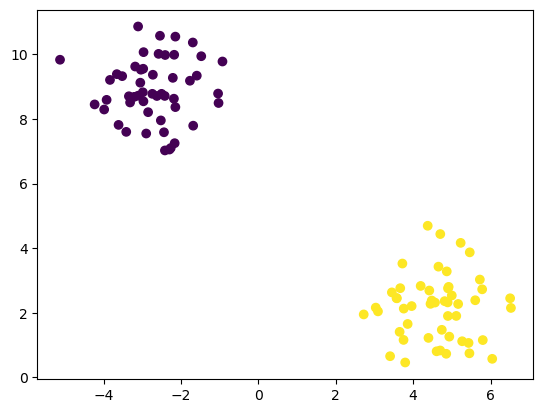

In [3]:
# Visualizing both classes
plt.scatter(X[:, 0], X[:, 1], c=y)

 ## Split our data into training and testing

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=1, 
                                                    stratify=y)

# Jon's Notes
We are going to see what's going on within splitting the data into training and testing datasets.

In [5]:
print(X.shape, y.shape) # Both X and y have 100 rows

(100, 2) (100,)


In [6]:
print(X_train.shape, y_train.shape) # Both X and y have 75 rows

(75, 2) (75,)


In [7]:
print(X_test.shape, y_test.shape) # Both X and y have 25 rows

(25, 2) (25,)


Thus, within the train_test_split method, it is helping us to split the data randomly on a 75-25 basis. You can change the portions using the "test_size" parameter.

#### What is stratify?
It is to ensure that the output is *evenly distributed randomly*. Our sample dataset is small, and you don't want the training data to be biased and have more "0" labels and your test data to have the "1" label. By making it even using stratify, it guarentees that the proportion of outcomes between training and test data to be even.

# End of Jon's Notes

 ## Create a Logistic Regression Model

In [8]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs', random_state=1)
classifier

LogisticRegression(random_state=1)

 ## Fit (train) or model using the training data

In [9]:
# Train the data
classifier.fit(X_train, y_train)

LogisticRegression(random_state=1)

 ## Validate the model using the test data

In [10]:
# Score the model
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 1.0
Testing Data Score: 1.0


 ## Make predictions

In [11]:
# Predict outcomes for test data set
predictions = classifier.predict(X_test)
pd.DataFrame({"Prediction": predictions, "Actual": y_test})

,Prediction,Actual
0,1,1
1,0,0
2,1,1
3,1,1
4,1,1
5,0,0
6,1,1
7,1,1
8,1,1
9,0,0


## Calculate the Accuracy Score

In [12]:
from sklearn.metrics import accuracy_score
# Display the accuracy score for the test dataset.
accuracy_score(y_test, predictions)

1.0

## Make a Prediction on a New Single Data Point

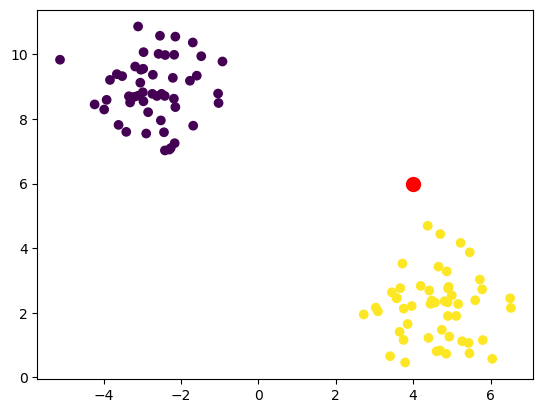

In [15]:
# Generate a new data point (the red circle)
import numpy as np
new_data = np.array([[4, 6]])
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.scatter(new_data[0, 0], new_data[0, 1], c="r", marker="o", s=100)

In [16]:
# Predict the class (purple or yellow) of the new data point
new_prediction = classifier.predict(new_data)
print("Classes are either 0 (purple) or 1 (yellow)")
print(f"The new point was classified as: {new_prediction}")

Classes are either 0 (purple) or 1 (yellow)
The new point was classified as: [1]
